In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV

In [2]:
heart = pd.read_csv(r"C:\Users\Tyler\Downloads\heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart_copy = heart.copy()
for colname in heart_copy.select_dtypes("object"):
    heart_copy[colname], _ = heart_copy[colname].factorize()

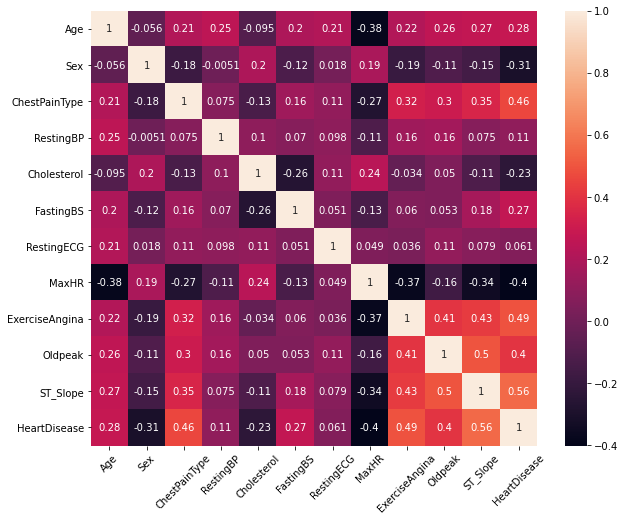

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(heart_copy.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

In [6]:
new_features = heart_copy.drop(columns=['Sex', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease'])
target = heart['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(new_features, target, test_size=0.2, random_state=0)

In [7]:
lr = LogisticRegression(max_iter = 500, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))

0.8315217391304348


In [8]:
rf = RandomForestClassifier(max_depth = 6, n_estimators = 100, random_state=42)
# params = {'n_estimators':range(50, 150, 10),
#                   'max_depth': [5,6,7]
#          }
# params = {'min_weight_fraction_leaf': np.linspace(0, 0.2, 4)}
# clf = GridSearchCV(rf, params)
# clf.fit(X_train, y_train)
# print(clf.best_params_)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.8260869565217391


In [9]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))

0.7717391304347826
